In [1]:
import pandas as pd
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

In [2]:
'''
Pandas as pd: Imports the pandas library for handling and analyzing structure
statsmodels.graphics.tsaplots as tsa_plots: Imports time-series
plotting functions such as ACF (Autocorrelation function)
and PACF (Partial Autocorrelation Function).
from statsmodels.tsa.arima.model import ARIMA:
    Imports the ARIMA model for time-series forecasting.
from sklearn.metrics import mean_squares_error:
    Imports the mean squared error function
    
'''

'\nPandas as pd: Imports the pandas library for handling and analyzing structure\nstatsmodels.graphics.tsaplots as tsa_plots: Imports time-series\nplotting functions such as ACF (Autocorrelation function)\nand PACF (Partial Autocorrelation Function).\nfrom statsmodels.tsa.arima.model import ARIMA:\n    Imports the ARIMA model for time-series forecasting.\nfrom sklearn.metrics import mean_squares_error:\n    Imports the mean squared error function\n    \n'

In [3]:
walmart=pd.read_csv("Walmart.csv")

In [4]:
#Data Partition
Train=walmart.head(147)
Train

,Month,Footfalls
0,Jan-91,1709
1,Feb-91,1621
2,Mar-91,1973
3,Apr-91,1812
4,May-91,1975
...,...,...
142,Nov-02,1858
143,Dec-02,1996
144,Jan-03,1778
145,Feb-03,1749


In [5]:
Test=walmart.tail(12)
Test

,Month,Footfalls
147,Apr-03,2099
148,May-03,2105
149,Jun-03,2130
150,Jul-03,2223
151,Aug-03,2174
152,Sep-03,1931
153,Oct-03,2121
154,Nov-03,2076
155,Dec-03,2141
156,Jan-04,1832


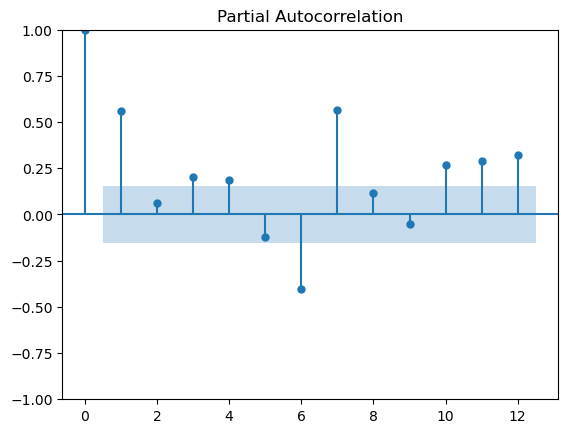

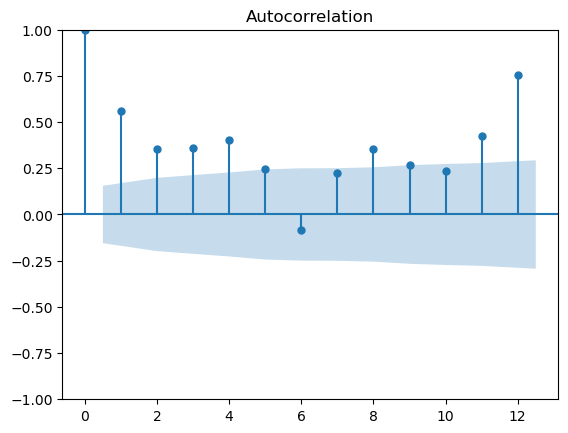

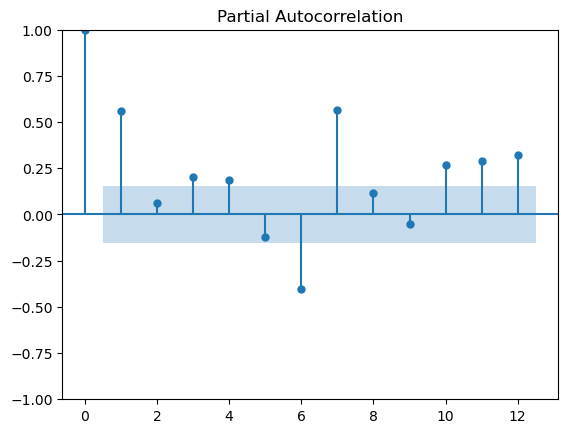

In [6]:
tsa_plots.plot_acf(walmart.Footfalls, lags=12)
tsa_plots.plot_pacf(walmart.Footfalls, lags=12)

In [7]:
#ARIMA with AR=4, MA=6
model1=ARIMA(Train.Footfalls,order=(4,1,6))

In [8]:
res1=model1.fit()

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
print(res1.summary())

                               SARIMAX Results                                
Dep. Variable:              Footfalls   No. Observations:                  147
Model:                 ARIMA(4, 1, 6)   Log Likelihood                -895.491
Date:                Thu, 30 Jan 2025   AIC                           1812.982
Time:                        16:29:21   BIC                           1845.802
Sample:                             0   HQIC                          1826.317
                                - 147                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7546      0.579     -1.303      0.193      -1.890       0.381
ar.L2         -0.7937      0.369     -2.150      0.032      -1.517      -0.070
ar.L3         -0.7447      0.583     -1.278      0.2

In [10]:
"""
Creates an ARIMA model with:
AR(Auto Regressive)term=4
I(Integrated)term=1(indicates first order diffrencing to make the data stationary)
MA(Moving Average)term=6

When to use Differencing (d in ARIMA)
Before selecting p and q, ensure the time series is stationary:

If the mean and variance change over time, apply differencing.
Use the Augmented Dickey-Fuller(ADF) test to check the stationarity.
If the series is not stationary, apply first order differencing(d=1).
"""
from statsmodels.tsa.stattools import adfuller
result=adfuller(walmart.Footfalls)
print('ADF Statistic: ',result[0])
print('p-value:',result[1])

#If p-value>0.05, the series is not stationary, so apply differencing(d=)


ADF Statistic:  -0.23499112877866932
p-value: 0.9342202042969283


## Forecast for next 12 months

In [11]:
start_index=len(Train)
end_index=start_index+11
forecast_test=res1.predict(start=start_index,end=end_index)

In [12]:
print(forecast_test)

147    1922.241616
148    1868.482452
149    1859.004278
150    2022.704017
151    1978.552654
152    1834.857464
153    1854.450922
154    2020.697205
155    1977.513851
156    1833.621810
157    1856.753933
158    2020.295859
Name: predicted_mean, dtype: float64


In [13]:
"""
start_index=len(Train)#:Begins prediction after the training dataset.
end_index=start_index+11#:predicts the next 12 periods.
res1.predict(start=start_index,end=end_index)#:Generates forecasts.
"""


'\nstart_index=len(Train)#:Begins prediction after the training dataset.\nend_index=start_index+11#:predicts the next 12 periods.\nres1.predict(start=start_index,end=end_index)#:Generates forecasts.\n'

# Evaluate Forecasts

In [14]:
rmse_test=sqrt(mean_squared_error(Test.Footfalls,forecast_test))
print('Test RMSE: %.3f'%rmse_test)

Test RMSE: 173.650


# Plot forecast against actual outcomes

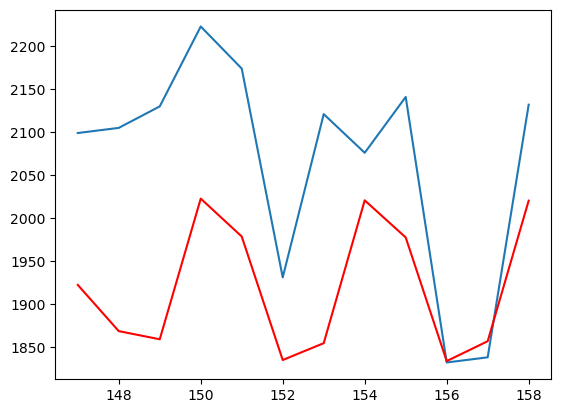

In [15]:
pyplot.plot(Test.Footfalls)
pyplot.plot(forecast_test,color='red')
pyplot.show()

In [16]:
#Auto-ARIMA- automatically discover the optimal order for an ARIMA model

In [18]:
"""
pmdarima is an Auto-Arima package that automatically selects the best(p,q)
start_p=0,start_q=0:Initial values for AR and MA terms.
max_p=12,max_q=12:Maximum values for ARa nd MA
m=1:Indicates a non seasonal model
d=None:Automatically determines the differencing order.
seasonal=False:Disables seasonal components.
trace=True:Displays the sel
"""

'\npmdarima is an Auto-Arima package that automatically selects the best(p,q)\nstart_p=0,start_q=0:Initial values for AR and MA terms.\nmax_p=12,max_q=12:Maximum values for ARa nd MA\nm=1:Indicates a non seasonal model\nd=None:Automatically determines the differencing order.\nseasonal=False:Disables seasonal components.\ntrace=True:Displays the sel\n'

In [19]:
import pmdarima as pm

In [20]:
ar_model=pm.auto_arima(Train.Footfalls, start_p=0, start_q=0,
                       max_p=12, max_q=12, #maximum p and q
                       m=1,                # frequency of series
                       d=None,             #let model determine 'd'
                       seasonal=False,     #No seasonality
                       start_P=0, trace=True,
                       error_action='warn', stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1916.696, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1908.134, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1887.358, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1914.726, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1874.405, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1875.051, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1874.985, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1873.101, Time=0.23 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1874.951, Time=0.47 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1869.771, Time=0.50 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1859.122, Time=0.66 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1853.611, Time=0.96 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=1

In [21]:
#Best parameters ARIMA
#ARIMA with AR=3, I=1, MA=5
model= ARIMA(Train.Footfalls, order =(3,1,5))

In [22]:
res=model.fit()

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:              Footfalls   No. Observations:                  147
Model:                 ARIMA(3, 1, 5)   Log Likelihood                -894.750
Date:                Thu, 30 Jan 2025   AIC                           1807.501
Time:                        16:32:16   BIC                           1834.353
Sample:                             0   HQIC                          1818.411
                                - 147                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4529      0.262      1.728      0.084      -0.061       0.967
ar.L2         -0.9933      0.013    -76.397      0.000      -1.019      -0.968
ar.L3          0.4567      0.264      1.727      0.0

In [24]:
#Forecast for next 12 months
start_index=len(Train)
end_index=start_index + 11
forecast_best= res1.predict(start=start_index, end=end_index)

In [25]:
ar_model=pm.auto_arima(Train.Footfalls, start_p=0, start_q=0,
                       max_p=12, max_q=12, #maximum p and q
                       m=1,                # frequency of series
                       d=None,             #let model determine 'd'
                       seasonal=False,     #No seasonality
                       start_P=0, trace=True,
                       error_action='warn', stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1916.696, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1908.134, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1887.358, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1914.726, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1874.405, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1875.051, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1874.985, Time=0.43 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1873.101, Time=0.20 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1874.951, Time=0.41 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1869.771, Time=0.51 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1859.122, Time=0.58 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1853.611, Time=0.87 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=1

In [26]:
#Best parameters ARIMA
#ARIMA with AR=3, I=1, MA=5
model= ARIMA(Train.Footfalls, order =(3,1,5))

In [27]:
res=model.fit()

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:              Footfalls   No. Observations:                  147
Model:                 ARIMA(3, 1, 5)   Log Likelihood                -894.750
Date:                Thu, 30 Jan 2025   AIC                           1807.501
Time:                        16:33:56   BIC                           1834.353
Sample:                             0   HQIC                          1818.411
                                - 147                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4529      0.262      1.728      0.084      -0.061       0.967
ar.L2         -0.9933      0.013    -76.397      0.000      -1.019      -0.968
ar.L3          0.4567      0.264      1.727      0.0

In [32]:
#Forecast for next 12 months
start_index=len(Train)
end_index=start_index + 11
forecast_best= res.predict(start=start_index, end=end_index)

In [33]:
print(forecast_best)

147    1951.292763
148    1869.786093
149    1865.812854
150    2004.772005
151    1975.367957
152    1822.211621
153    1845.518175
154    1994.771980
155    1969.270948
156    1820.114991
157    1846.057841
158    1994.314509
Name: predicted_mean, dtype: float64


In [34]:
#Evaluate forecats
rmse_best=sqrt(mean_squared_error(Test.Footfalls, forecast_best))
print('Test RMSE: %3f' % rmse_best)

Test RMSE: 177.245942


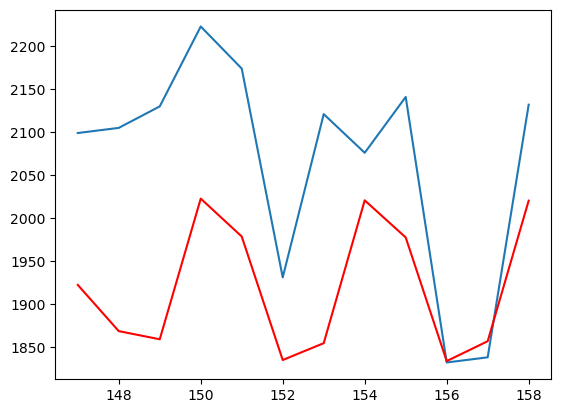

In [35]:
pyplot.plot(Test.Footfalls)
pyplot.plot(forecast_test,color='red')
pyplot.show()